In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [4]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [5]:
df_train.shape

(54808, 13)

In [6]:
df_test.shape

(23490, 12)

In [7]:
df_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [8]:
df_train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [9]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
df_train['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [11]:
df_train['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

In [12]:
df_train['gender'].value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

In [13]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808.0,NaN,NaN,NaN,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808.0,NaN,NaN,NaN,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,NaN,NaN,NaN,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,NaN,NaN,NaN,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,NaN,NaN,NaN,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0


<Axes: ylabel='count'>

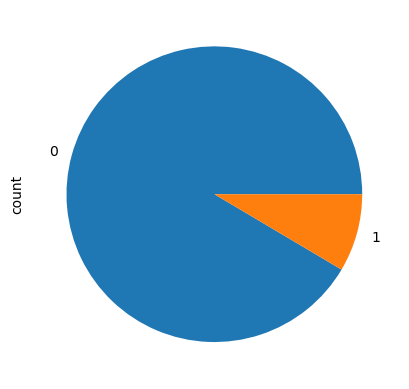

In [14]:
df_train['is_promoted'].value_counts().plot(kind='pie')

In [15]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [16]:
miss_percent=((df_train.isnull().sum()/df_train.shape[0])*100).round(2)
miss_percent

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

In [17]:
miss_percent_test=((df_test.isnull().sum()/df_train.shape[0])*100).round(2)
miss_percent_test

employee_id             0.00
department              0.00
region                  0.00
education               1.89
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    3.31
length_of_service       0.00
awards_won?             0.00
avg_training_score      0.00
dtype: float64

In [18]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [19]:
df_train['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [20]:
df_train['previous_year_rating'].value_counts()

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [21]:
df_train['education']=df_train['education'].fillna("Bachelor's")
df_train['previous_year_rating']=df_train['previous_year_rating'].fillna(3.0)

In [22]:
df_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [23]:
df_train['education'].value_counts()

education
Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [24]:
df_train['previous_year_rating'].value_counts()

previous_year_rating
3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64

In [25]:
df_test['previous_year_rating'].value_counts()

previous_year_rating
3.0    7921
5.0    5097
4.0    4249
1.0    2680
2.0    1731
Name: count, dtype: int64

In [26]:
df_test['education']=df_test['education'].fillna("Bachelor's")
df_test['previous_year_rating']=df_test['previous_year_rating'].fillna(3.0)

In [27]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [28]:
df_train.drop('employee_id',axis=1,inplace=True)

In [29]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


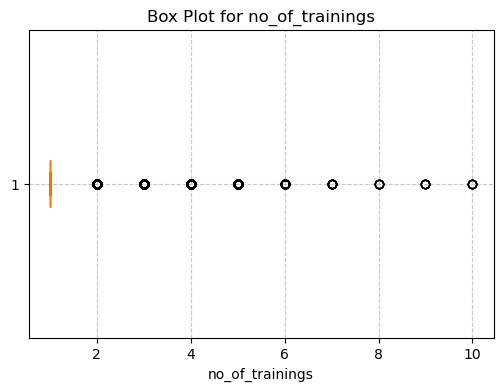

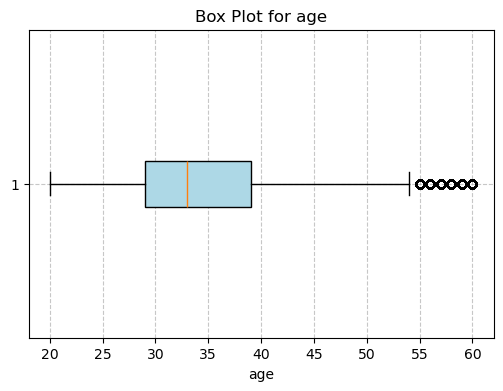

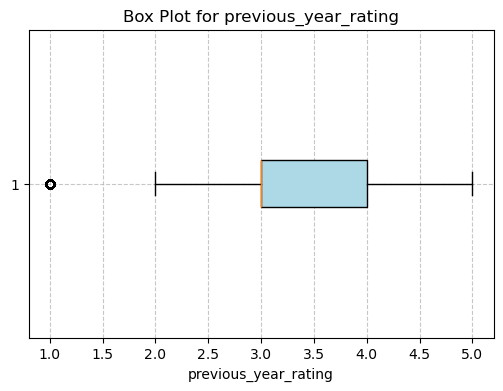

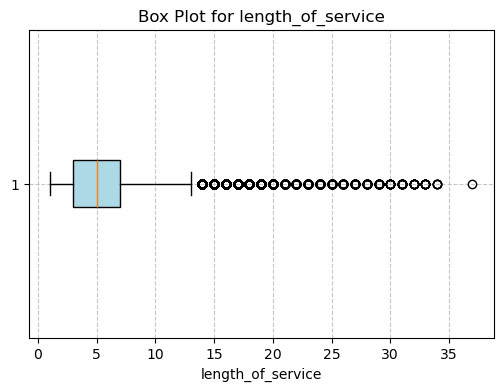

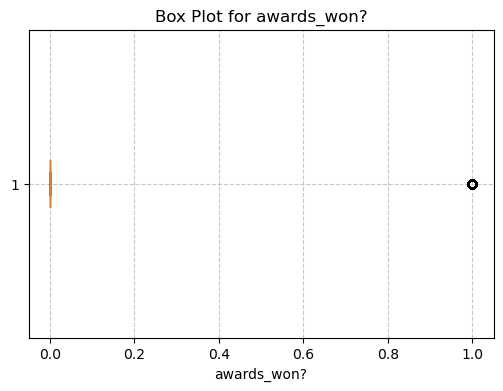

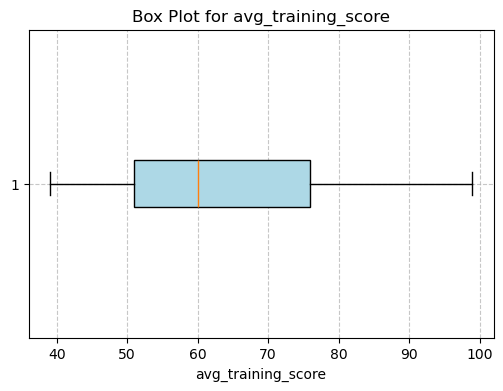

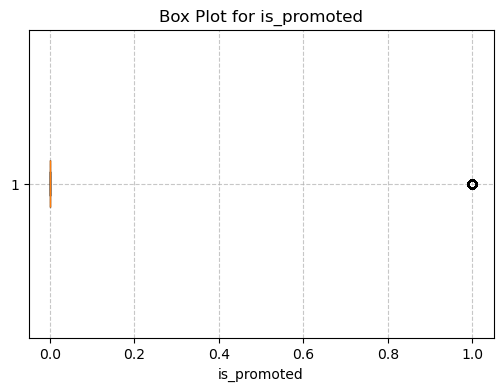

In [30]:
# Loop through each numerical column and create a box plot
for column in df_train.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_train[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


In [31]:
df_train['length_of_service'].value_counts()

length_of_service
3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: count, dtype: int64

<Axes: ylabel='length_of_service'>

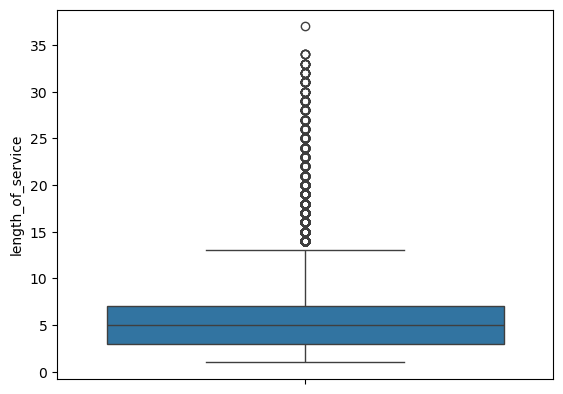

In [32]:
sns.boxplot(df_train['length_of_service'])

In [33]:
# Calculate Q1, Q3, and IQR
Q1 = df_train['length_of_service'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_train['length_of_service'].quantile(0.75 g)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_train_cleaned = df_train[(df_train['length_of_service'] >= lower_bound) & (df_train['length_of_service'] <= upper_bound)]

# Display results
print("Original DataFrame:")
df_train
print("\nCleaned DataFrame (Outliers Removed):")
df_train_cleaned


Original DataFrame:

Cleaned DataFrame (Outliers Removed):


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,45,0


In [34]:
df_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,45,0


In [35]:
df_train_cleaned['length_of_service'].value_counts()

length_of_service
3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
Name: count, dtype: int64

In [36]:
df_train=df_train[df_train['length_of_service']<13]

In [37]:
df_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [38]:
df_train[['gender','is_promoted']]

,gender,is_promoted
0,f,0
1,m,0
2,m,0
3,m,0
4,m,0
...,...,...
54802,m,0
54804,f,0
54805,m,0
54806,m,0


In [39]:
# Calculate the promotion rate for each gender
promotion_rate = df_train.groupby('gender')['is_promoted'].mean()

# Identify the gender with the highest promotion rate
most_promoted_gender = promotion_rate.idxmax()
highest_rate = promotion_rate.max()

# Display the results
print("Promotion rates by gender:")
print(promotion_rate)
print(f"\nThe gender with the highest promotion rate is {most_promoted_gender} with a rate of {highest_rate:.2f}.")

Promotion rates by gender:
gender
f    0.092287
m    0.084064
Name: is_promoted, dtype: float64

The gender with the highest promotion rate is f with a rate of 0.09.


<Axes: ylabel='count'>

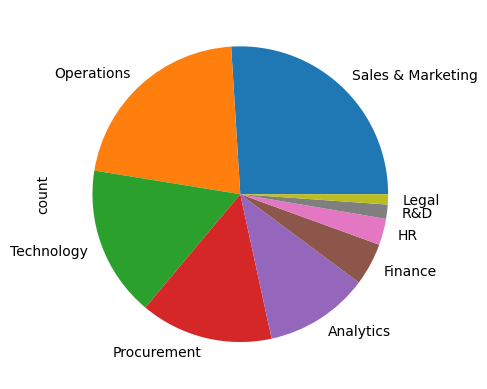

In [40]:
df_train[(df_train['department'].notnull()) & (df_train['is_promoted'] == 1)]['department'].value_counts().plot(kind='pie')

(array([  870.,  7031., 13750., 12529.,  8185.,  4306.,  1703.,  1055.,
          709.,   494.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <BarContainer object of 10 artists>)

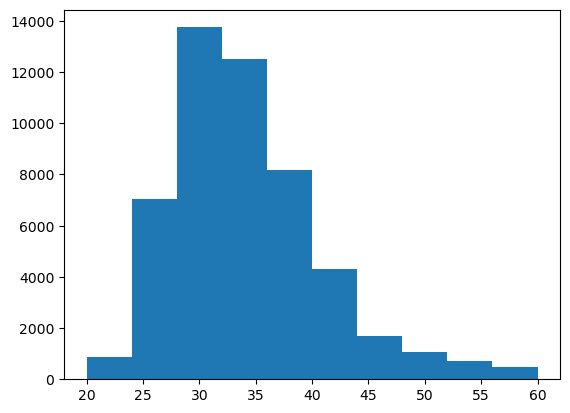

In [41]:
plt.hist(df_train['age'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\2558241576.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_train['department'],palette='spring')


<Axes: xlabel='count', ylabel='department'>

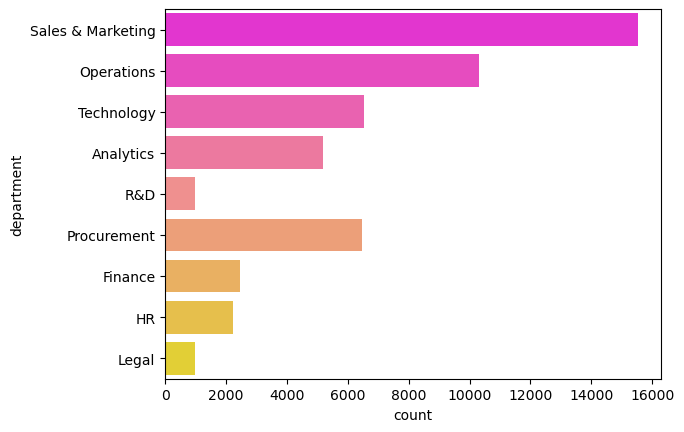

In [42]:
sns.countplot(df_train['department'],palette='spring')

C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\341690573.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_train['region'],palette='spring')


<Axes: xlabel='count', ylabel='region'>

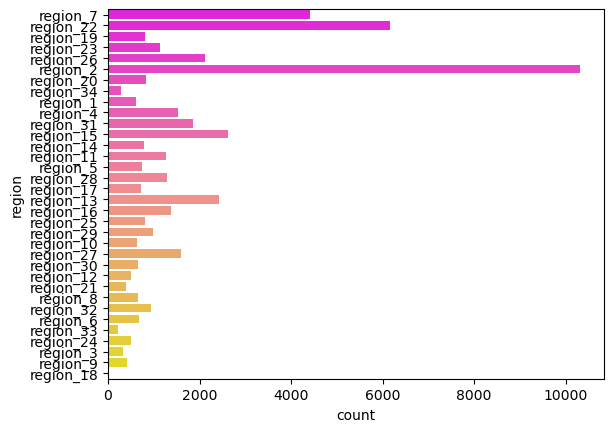

In [43]:
sns.countplot(df_train['region'],palette='spring')

(array([4.0744e+04, 7.5560e+03, 1.6960e+03, 4.5000e+02, 1.2200e+02,
        3.9000e+01, 1.1000e+01, 5.0000e+00, 5.0000e+00, 4.0000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

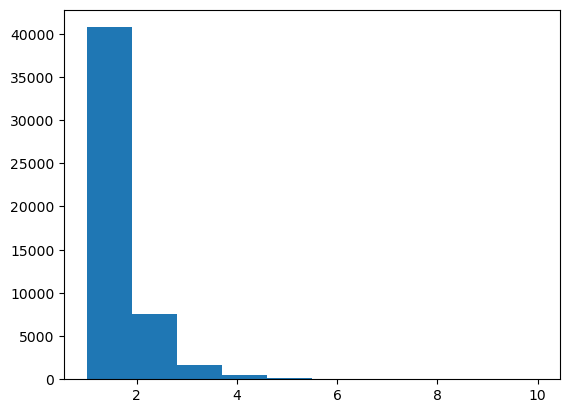

In [44]:
plt.hist(df_train['no_of_trainings'])

In [45]:
df_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

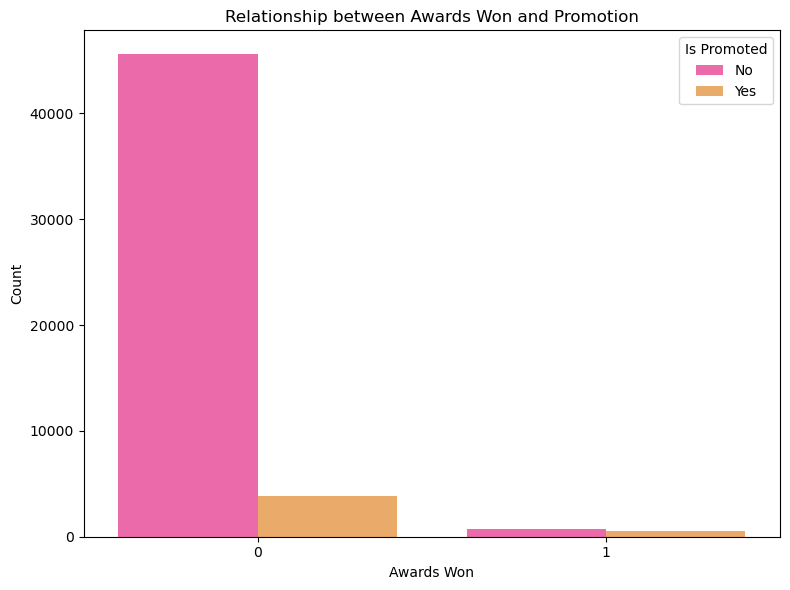

In [46]:
# Countplot to show the relationship
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='awards_won?', hue='is_promoted', palette='spring')
plt.title('Relationship between Awards Won and Promotion')
plt.xlabel('Awards Won')
plt.ylabel('Count')
plt.legend(title='Is Promoted', labels=['No', 'Yes'])
plt.tight_layout()

# Display the plot
plt.show()


<Axes: >

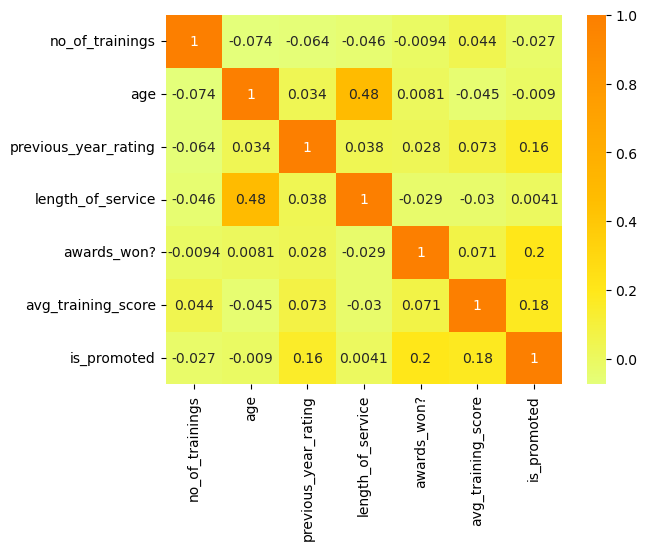

In [47]:
sns.heatmap(df_train.corr(numeric_only=True),annot=True,cmap='Wistia')

In [48]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


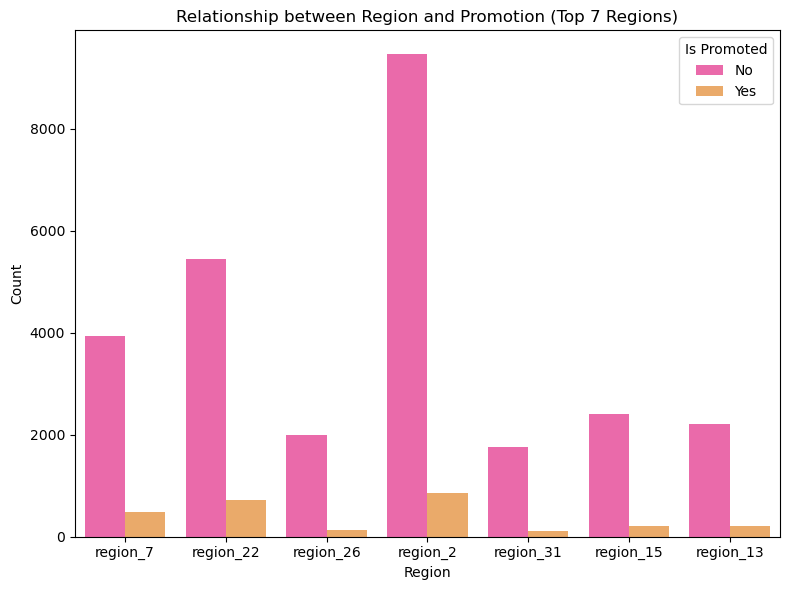

In [49]:
# Get top 7 regions based on frequency
top_regions = df_train['region'].value_counts().nlargest(7).index
df_top_regions = df_train[df_train['region'].isin(top_regions)]

# Countplot to show the relationship for top 7 regions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_top_regions, x='region', hue='is_promoted', palette='spring')
plt.title('Relationship between Region and Promotion (Top 7 Regions)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Is Promoted', labels=['No', 'Yes'])
plt.tight_layout()

# Display the plot
plt.show()


In [50]:
# Filter the dataset for promoted employees
promoted_df = df_train[df_train['is_promoted'] == 1]

# Count the number of promotions per region
promotions_per_region = promoted_df.groupby('region').size()

# Display results
print("Number of Promotions by Region:")
print(promotions_per_region)


Number of Promotions by Region:
region
region_1      56
region_10     50
region_11     70
region_12     32
region_13    215
region_14     59
region_15    212
region_16     93
region_17    103
region_18      1
region_19     52
region_2     860
region_20     49
region_21     18
region_22    711
region_23    135
region_24     17
region_25    102
region_26    136
region_27    125
region_28    152
region_29     40
region_3      36
region_30     59
region_31    109
region_32     40
region_33      9
region_34      8
region_4     227
region_5      33
region_6      31
region_7     481
region_8      51
region_9       8
dtype: int64


In [51]:
# Filter the dataset for promoted employees
promoted_df = df_train[df_train['is_promoted'] == 1]

# Count promotions per department
promotion_counts = promoted_df['department'].value_counts()

# Find the department with the maximum promotions
max_promotion_department = promotion_counts.idxmax()
max_promotions = promotion_counts.max()

# Display results
print("Department with Maximum Promotions:")
print(f"{max_promotion_department} with {max_promotions} promotions")


Department with Maximum Promotions:
Sales & Marketing with 1138 promotions


In [52]:
df_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [53]:
df_train['gender'].value_counts()


gender
m    35592
f    15040
Name: count, dtype: int64

In [54]:
# Group by department and gender, then count occurrences
gender_counts = df_train.groupby(['department', 'gender']).size().reset_index(name='count')

# Display results
print("Number of Males and Females in Each Department:")
print(gender_counts)

Number of Males and Females in Each Department:
           department gender  count
0           Analytics      f    511
1           Analytics      m   4676
2             Finance      f    652
3             Finance      m   1795
4                  HR      f    919
5                  HR      m   1307
6               Legal      f    143
7               Legal      m    845
8          Operations      f   4271
9          Operations      m   6026
10        Procurement      f   2985
11        Procurement      m   3478
12                R&D      f     57
13                R&D      m    928
14  Sales & Marketing      f   2935
15  Sales & Marketing      m  12584
16         Technology      f   2567
17         Technology      m   3953


In [55]:
df_train['sum_metric']=df_train['awards_won?']+df_train['previous_year_rating']
df_test['sum_metric']=df_test['awards_won?']+df_test['previous_year_rating']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\2355449017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['sum_metric']=df_train['awards_won?']+df_train['previous_year_rating']


In [56]:
df_train['total_score']=df_train['avg_training_score']* df_train['no_of_trainings']
df_test['total_score']=df_test['avg_training_score']* df_test['no_of_trainings']

C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\42396781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['total_score']=df_train['avg_training_score']* df_train['no_of_trainings']


In [57]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,5.0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,5.0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,3.0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,1.0,100
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,3.0,73


In [58]:
#df_train.drop(['awards_won?','previous_year_rating','avg_training_score','no_of_trainings'],axis=1,inplace=True)

In [59]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,5.0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,5.0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,3.0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,1.0,100
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,3.0,73


In [60]:
#df_test.drop(['awards_won?','previous_year_rating','avg_training_score','no_of_trainings'],axis=1,inplace=True)

In [61]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,sum_metric,total_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,0,77,3.0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51,3.0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47,1.0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65,2.0,195
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61,4.0,61


In [62]:
df_test.drop('employee_id',axis=1,inplace=True)

In [63]:
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,sum_metric,total_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,0,77,3.0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51,3.0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47,1.0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65,2.0,195
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61,4.0,61


In [64]:
df_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,5.0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0,5.0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,3.0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0,1.0,100
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0,3.0,73


In [65]:
# Extract only the numerical values from the 'region' column
df_train['region'] = df_train['region'].str.extract('(\d+)')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\3422288752.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_train['region'] = df_train['region'].str.extract('(\d+)')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\3422288752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['region'] = df_train['region'].str.extract('(\d+)')


In [66]:
# Display the results
print("DataFrame with Numerical Values from Region Column:")
df_train


DataFrame with Numerical Values from Region Column:


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0,5.0,49
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,60,0,5.0,60
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0,3.0,50
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,50,0,1.0,100
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,73,0,3.0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,14,Bachelor's,m,other,2,31,1.0,2,0,49,0,1.0,98
54804,Operations,27,Master's & above,f,other,1,37,2.0,6,0,56,0,2.0,56
54805,Analytics,1,Bachelor's,m,other,1,27,5.0,3,0,79,0,5.0,79
54806,Sales & Marketing,9,Bachelor's,m,sourcing,1,29,1.0,2,0,45,0,1.0,45


In [67]:
df_train['region']=df_train['region'].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\3798154204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['region']=df_train['region'].astype(int)


In [68]:
df_train.corr(numeric_only=True)

,region,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
region,1.000000,-0.005297,-0.201381,-0.025015,-0.085759,0.002033,0.028185,-0.013739,-0.024474,0.007374
no_of_trainings,-0.005297,1.000000,-0.074026,-0.063735,-0.045533,-0.009450,0.043686,-0.026739,-0.064196,0.902183
age,-0.201381,-0.074026,1.000000,0.033623,0.483568,0.008129,-0.044703,-0.009007,0.034261,-0.082056
previous_year_rating,-0.025015,-0.063735,0.033623,1.000000,0.037908,0.027667,0.073157,0.155299,0.992060,-0.013571
length_of_service,-0.085759,-0.045533,0.483568,0.037908,1.000000,-0.029114,-0.029795,0.004144,0.033812,-0.051891
awards_won?,0.002033,-0.009450,0.008129,0.027667,-0.029114,1.000000,0.071175,0.199325,0.153167,0.016632
avg_training_score,0.028185,0.043686,-0.044703,0.073157,-0.029795,0.071175,1.000000,0.179989,0.081276,0.427436
is_promoted,-0.013739,-0.026739,-0.009007,0.155299,0.004144,0.199325,0.179989,1.000000,0.178603,0.043893
sum_metric,-0.024474,-0.064196,0.034261,0.992060,0.033812,0.153167,0.081276,0.178603,1.000000,-0.011324
total_score,0.007374,0.902183,-0.082056,-0.013571,-0.051891,0.016632,0.427436,0.043893,-0.011324,1.000000


In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode the columns
df_train['department'] = label_encoder.fit_transform(df_train['department'])
df_train['education'] = label_encoder.fit_transform(df_train['education'])
df_train['gender'] = label_encoder.fit_transform(df_train['gender'])
df_train['recruitment'] = label_encoder.fit_transform(df_train['recruitment_channel'])

# Display the results
print("DataFrame with Label Encoded Columns:")
df_train


DataFrame with Label Encoded Columns:


C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\1560963788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['department'] = label_encoder.fit_transform(df_train['department'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\1560963788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['education'] = label_encoder.fit_transform(df_train['education'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\1560963788.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score,recruitment
0,7,7,2,0,sourcing,1,35,5.0,8,0,49,0,5.0,49,2
1,4,22,0,1,other,1,30,5.0,4,0,60,0,5.0,60,0
2,7,19,0,1,sourcing,1,34,3.0,7,0,50,0,3.0,50,2
3,7,23,0,1,other,2,39,1.0,10,0,50,0,1.0,100,0
4,8,26,0,1,other,1,45,3.0,2,0,73,0,3.0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,7,14,0,1,other,2,31,1.0,2,0,49,0,1.0,98,0
54804,4,27,2,0,other,1,37,2.0,6,0,56,0,2.0,56,0
54805,0,1,0,1,other,1,27,5.0,3,0,79,0,5.0,79,0
54806,7,9,0,1,sourcing,1,29,1.0,2,0,45,0,1.0,45,2


In [70]:
df_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score', 'recruitment'],
      dtype='object')

In [71]:
# Label encode the columns
df_test['department'] = label_encoder.fit_transform(df_test['department'])
df_test['education'] = label_encoder.fit_transform(df_test['education'])
df_test['gender'] = label_encoder.fit_transform(df_test['gender'])
df_test['recruitment_channel'] = label_encoder.fit_transform(df_test['recruitment_channel'])

# Display the results
print("DataFrame with Label Encoded Columns:")
df_test


DataFrame with Label Encoded Columns:


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,sum_metric,total_score
0,8,region_26,0,1,2,1,24,3.0,1,0,77,3.0,77
1,2,region_4,0,0,0,1,31,3.0,5,0,51,3.0,51
2,7,region_13,0,1,0,1,31,1.0,4,0,47,1.0,47
3,5,region_2,0,0,0,3,31,2.0,9,0,65,2.0,195
4,1,region_29,0,1,2,1,30,4.0,7,0,61,4.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,region_2,1,1,2,1,24,3.0,1,0,61,3.0,61
23486,8,region_25,0,1,2,1,31,3.0,7,0,74,3.0,74
23487,2,region_16,0,0,2,1,26,4.0,4,0,50,4.0,50
23488,5,region_31,0,1,2,3,27,3.0,1,0,70,3.0,210


In [72]:
df_test['region'] = df_test['region'].str.extract('(\d+)')
df_test['region']=df_test['region'].astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\3181310146.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_test['region'] = df_test['region'].str.extract('(\d+)')


In [73]:
df_test.head()


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,sum_metric,total_score
0,8,26,0,1,2,1,24,3.0,1,0,77,3.0,77
1,2,4,0,0,0,1,31,3.0,5,0,51,3.0,51
2,7,13,0,1,0,1,31,1.0,4,0,47,1.0,47
3,5,2,0,0,0,3,31,2.0,9,0,65,2.0,195
4,1,29,0,1,2,1,30,4.0,7,0,61,4.0,61


In [74]:
df_train.drop('recruitment_channel',axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11120\2633677846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('recruitment_channel',axis=1,inplace=True)


In [75]:
X=df_train.drop(['is_promoted'],axis=1)
y=df_train['is_promoted']

In [76]:
X.shape

(50632, 13)

In [77]:
y.shape

(50632,)

In [78]:
from imblearn.over_sampling import SMOTE
over_sample=SMOTE()
X,y=over_sample.fit_resample(X,y)

In [79]:
X.shape

(92504, 13)

In [80]:
y.shape

(92504,)

In [81]:
x_test=df_test

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,x_valid,y_train,y_valid=train_test_split(X,y,random_state=42,test_size=.2)

Train Accuracy: 0.9994074805579558
Validation Accuracy: 0.8842583448548291
Test Accuracy: 0.8736176935229067


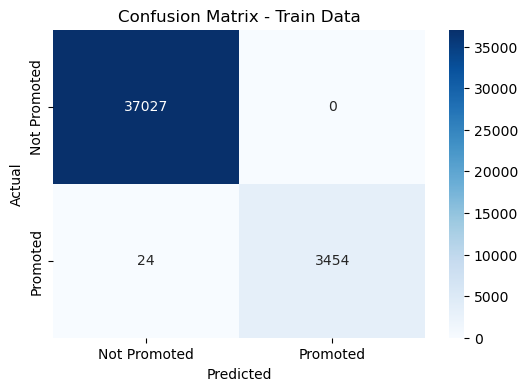

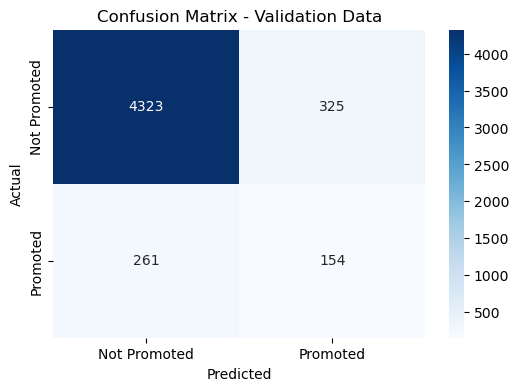

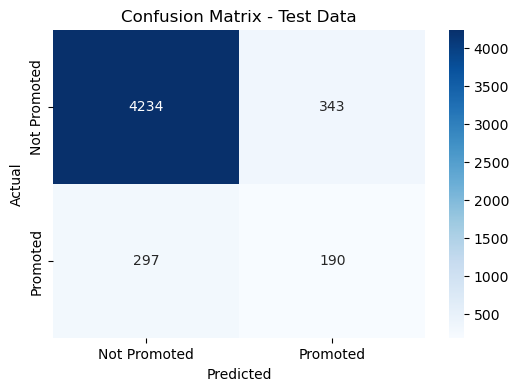

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Split data into features (X) and target (y)
X = df_train.drop(columns=['is_promoted'])
y = df_train['is_promoted']

# Split the data into train, validation, and test sets (80% train, 10% valid, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions on train, valid, and test data
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
y_test_pred = clf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate confusion matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
valid_conf_matrix = confusion_matrix(y_valid, y_valid_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print Accuracy Scores
print(f"Train Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {valid_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Display Confusion Matrices
def plot_confusion_matrix(cm, dataset_type):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'])
    plt.title(f"Confusion Matrix - {dataset_type}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each dataset
plot_confusion_matrix(train_conf_matrix, 'Train Data')
plot_confusion_matrix(valid_conf_matrix, 'Validation Data')
plot_confusion_matrix(test_conf_matrix, 'Test Data')


Train Accuracy: 0.9994074805579558
Validation Accuracy: 0.8842583448548291
Test Accuracy: 0.8736176935229067

Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37027
           1       1.00      0.99      1.00      3478

    accuracy                           1.00     40505
   macro avg       1.00      1.00      1.00     40505
weighted avg       1.00      1.00      1.00     40505


Validation Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      4648
           1       0.32      0.37      0.34       415

    accuracy                           0.88      5063
   macro avg       0.63      0.65      0.64      5063
weighted avg       0.89      0.88      0.89      5063


Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4577
           1       0.36      0.

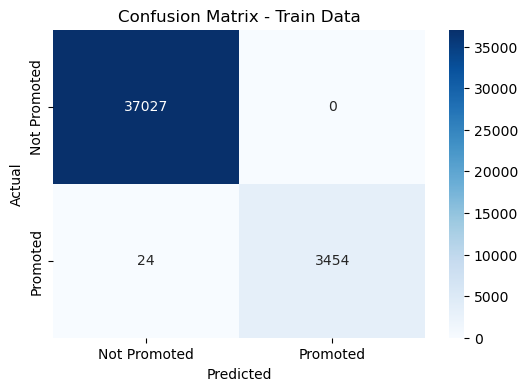

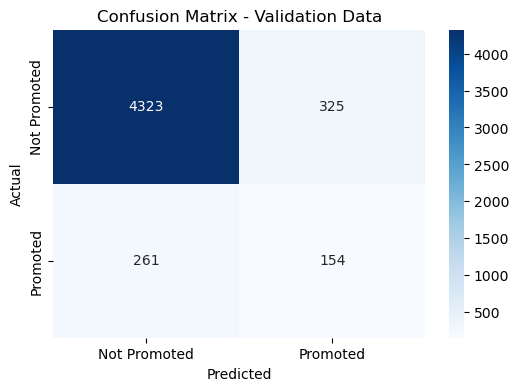

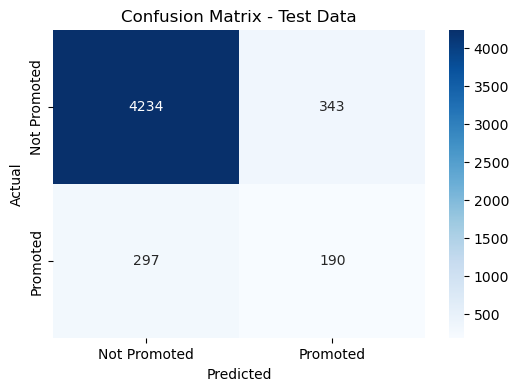

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Split data into features (X) and target (y)
X = df_train.drop(columns=['is_promoted'])
y = df_train['is_promoted']

# Split the data into train, validation, and test sets (80% train, 10% valid, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions on train, valid, and test data
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
y_test_pred = clf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate confusion matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
valid_conf_matrix = confusion_matrix(y_valid, y_valid_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print Classification Reports
train_report = classification_report(y_train, y_train_pred)
valid_report = classification_report(y_valid, y_valid_pred)
test_report = classification_report(y_test, y_test_pred)

# Print Accuracy Scores
print(f"Train Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {valid_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Print Classification Reports
print("\nTrain Classification Report:\n", train_report)
print("\nValidation Classification Report:\n", valid_report)
print("\nTest Classification Report:\n", test_report)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, dataset_type):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'])
    plt.title(f"Confusion Matrix - {dataset_type}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for train, validation, and test datasets
plot_confusion_matrix(train_conf_matrix, 'Train Data')
plot_confusion_matrix(valid_conf_matrix, 'Validation Data')
plot_confusion_matrix(test_conf_matrix, 'Test Data')
